<a href="https://colab.research.google.com/github/kshitizs11/Pokemon-Classification-/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")

In [ ]:
classes = ['Aerodactyl', 'Bulbasaur', 'Charmander', 'Dratini', 'Fearow', 'Meowth', 'Pikachu', 'Psyduck', 'Spearow', 'Squirtle' ]

In [ ]:
for c in classes:
  if not os.path.isdir("val_images/" + c):
    os.mkdir("val_images/" + c)

In [ ]:
split = 0.9
for dirc in os.listdir("/content/drive/My Drive/Colab Notebooks/train"):
  path = "/content/drive/My Drive/Colab Notebooks/train/" + dirc
  #all images
  images = os.listdir(path)
  split_size = int(len(images)*split)

  files_to_move = images[split_size:]
  print(files_to_move)
  print()

  #move
  for f in files_to_move:
    src = os.path.join(path,f) #path+file
    dest = os.path.join("val_images/",dirc)
    shutil.move(src,dest)

['666e91626cd74c1a8959d07f3d859946.jpg', 'aad0acbe511d43868c82a68bd9a4aa8b.jpg', '00000229.jpg', '7fb36ffead6745a3b6b6d8f1aaf7a0cc.jpg', '84d0bdfbc2ea454982419ed7fbd124f7.jpg', '2292452c3ff6482888cfd21ddf254549.jpg', '00000002.png', '00000214.jpg', '00000200.jpg', '00000228.png', '5139f5a857fa4f908926080fb1009a80.jpg', '8934e3e3f1fa43edb64c94a80bfaca87.jpg', '00000016.jpg', 'eec69a5d64c1479e9312ac16855d4a27.jpg', '00000189.jpg', '00000162.jpg', '00000176.jpg', 'a7f4a6d180df4299aaea3fa4789c5989.jpg', '57c7df091eff49c8a334f22acf1fda77.jpg', '00000172.jpg', '00000166.jpg', '00000199.jpg', '1f936219aac24261843dbe7dcb7974b0.jpg', 'd59a06fbbfb8439a99705abd4e40902d.jpg', '00000210.png']

['e8a137a1e0444de8a5b5d52ec88190f7.jpg', '6689166bff9b4da3b6595a2a63665dbd.jpg', '5d90f46d2ce140689f936bf84c59f840.jpg', 'f9082286df7a4e7a9f0ffe9f62d58b72.jpg', '2a6471635a3c4fc19f6c95f33847e72b.jpg', '4f4b7e1f8e0146c39be99e5448c5fad6.jpg', 'b93b78dbe62c4287be9ff244007d31e5.jpg', 'edaa5f349cb9448491f5b8fcdec8

In [ ]:
for dirc in os.listdir("/content/drive/My Drive/Colab Notebooks/train/"):
  path = "/content/drive/My Drive/Colab Notebooks/train/" + dirc
  img = os.listdir(path)
  print(dirc, len(img))

Pikachu 216
Spearow 94
Psyduck 115
Meowth 50
Bulbasaur 206
Dratini 79
Fearow 89
Squirtle 200
Aerodactyl 64
Charmander 213


In [ ]:
for dirc in os.listdir("/content/drive/My Drive/Colab Notebooks/train/"):
  path = "/content/drive/My Drive/Colab Notebooks/train/" + dirc
  img = os.listdir(path)
  print(dirc, len(img))

Meowth 6
Dratini 9
Aerodactyl 8
Bulbasaur 23
Squirtle 23
Psyduck 13
Spearow 11
Fearow 10
Charmander 24
Pikachu 25


## *Image Augmentation*

In [ ]:
from keras.preprocessing import image

In [ ]:
train_gen = image.ImageDataGenerator(rotation_range=20,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.3,
                                     horizontal_flip = True
                                     )

In [ ]:
#no values because it is validation dataset
val_datagen = image.ImageDataGenerator()

### Train Gen

In [ ]:
train_generator = train_gen.flow_from_directory("/content/drive/My Drive/Colab Notebooks/train",
                                                target_size = (224,224),
                                                class_mode = "categorical",
                                                shuffle = True,
                                                batch_size = 32
                                                )

Found 1322 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

### Just trying

In [ ]:
d,l = next(train_generator)

In [ ]:
d.shape, l.shape

((32, 224, 224, 3), (32, 10))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


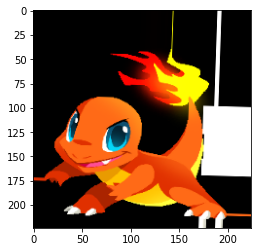

In [ ]:
plt.imshow(d[0].astype('int'))
print(l[0])

### Val **Gen**   

In [ ]:
val_generator = val_datagen.flow_from_directory("val_images/",
                                                target_size = (224,224),
                                                class_mode = 'categorical',
                                                batch_size=32)

Found 152 images belonging to 10 classes.


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


In [ ]:
resnet = ResNet50(include_top= True, weights= "imagenet")

102973440/102967424 [==============================] - 2s 0us/step


In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model

#get top n-2 layers 
x = resnet.layers[-2].output
fun = Dense(10, activation = "softmax")(x)

In [ ]:
model = Model(inputs=resnet.input, outputs = fun)

In [ ]:
# Freeze layers
for l in model.layers[:-6]:
  l.trainable = False
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
hist = model.fit(train_generator,steps_per_epoch=1306//32,epochs=10,
                              validation_data=val_generator,validation_steps=168//32)

Epoch 1/10
15/40 [==========>...................] - ETA: 9:42 - loss: 1.5574 - accuracy: 0.5415

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/40 [==============================] - 979s 24s/step - loss: 0.9532 - accuracy: 0.7083 - val_loss: 0.5216 - val_accuracy: 0.8224
Epoch 2/10
40/40 [==============================] - 60s 2s/step - loss: 0.3148 - accuracy: 0.9030 - val_loss: 0.5219 - val_accuracy: 0.7697
Epoch 3/10
40/40 [==============================] - 36s 898ms/step - loss: 0.2024 - accuracy: 0.9388 - val_loss: 0.4220 - val_accuracy: 0.8289
Epoch 4/10
40/40 [==============================] - 35s 881ms/step - loss: 0.1625 - accuracy: 0.9515 - val_loss: 0.5141 - val_accuracy: 0.8224
Epoch 5/10
40/40 [==============================] - 36s 892ms/step - loss: 0.1445 - accuracy: 0.9610 - val_loss: 0.4993 - val_accuracy: 0.8750
Epoch 6/10
40/40 [==============================] - 35s 876ms/step - loss: 0.1167 - accuracy: 0.9690 - val_loss: 0.4540 - val_accuracy: 0.8553
Epoch 7/10
40/40 [==============================] - 36s 910ms/step - loss: 0.1048 - accuracy: 0.9727 - val_loss: 0.5147 - val_accuracy: 0.8487
Epoch 8/10
40/

In [ ]:
y_pred = model.predict(val_generator)

In [ ]:
model.evaluate(val_generator)

5/5 [==============================] - 2s 425ms/step - loss: 0.4531 - accuracy: 0.8487


[0.45306405425071716, 0.8486841917037964]

In [ ]:
# !rm -rf val_images